# **Forecast the incident volume in different fields**

### Import necessary libraries

In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings ('ignore')
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import datetime as dt 
from scipy import stats
import statsmodels.api as sm
import pandas.testing as tm
import itertools
import matplotlib as pyplot

### Loading the dataset

In [15]:
data=pd.read_csv('C:\\Users\suchi\CDS Internship Datamites\ITSM_data.csv')
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [5]:
data.shape

(46606, 25)

In [6]:
data['Close_Time'] = pd.to_datetime(data['Close_Time'] ,format='mixed' )

In [7]:
data['Open_Time'] = pd.to_datetime(data['Open_Time'] ,format='mixed' )

In [8]:
data['Reopen_Time'] = pd.to_datetime(data['Reopen_Time'] ,format='mixed' )

In [9]:
data['Resolved_Time'] = pd.to_datetime(data['Resolved_Time'] ,format='mixed' )

In [17]:
# importing necessary columns 
inc_fct = data.loc[:,['Incident_ID' , 'Open_Time']]
inc_fct


,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01
...,...,...
46601,IM0047053,31-03-2014 16:23
46602,IM0047054,31-03-2014 15:03
46603,IM0047055,31-03-2014 15:28
46604,IM0047056,31-03-2014 15:35


## Data Processing

In [18]:
# converting all value in perper datetime format

for i in range(len(inc_fct.Open_Time)):
    if (inc_fct.Open_Time[i][1]=='/'):
        inc_fct.Open_Time[i] = dt.datetime.strptime(inc_fct.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (inc_fct.Open_Time[i][2]=='/'):
        inc_fct.Open_Time[i] = dt.datetime.strptime(inc_fct.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        inc_fct.Open_Time[i] = dt.datetime.strptime(inc_fct.Open_Time[i],'%d-%m-%Y %H:%M').date()



In [19]:
inc_fct.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [20]:
# adding new column which will have the number o incident per day
inc_fct ['No_Incidents'] = inc_fct.groupby('Open_Time')['Incident_ID'].transform('count')


In [21]:
inc_fct.drop(['Incident_ID'] , axis = 1,inplace = True)
inc_fct.drop_duplicates(inplace = True)

In [22]:
inc_fct.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [23]:
inc_fct = inc_fct.set_index("Open_Time")
inc_fct.index = pd.to_datetime(inc_fct.index)
inc_fct.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [24]:
inc_fct.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [26]:
# checking range of dates 
inc_fct.index.min() ,'to' , inc_fct.index.max()

(Timestamp('2012-02-05 00:00:00'), 'to', Timestamp('2014-03-31 00:00:00'))

In [27]:
# making new series with frequency

data1 = inc_fct['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [28]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

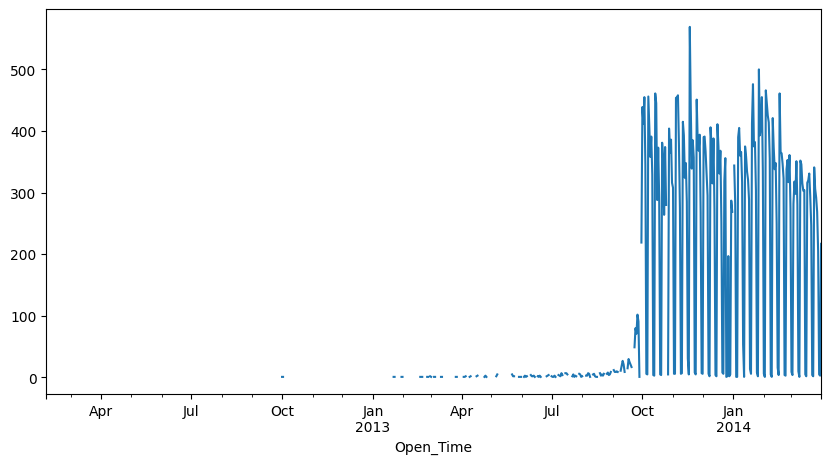

In [30]:
# plotting number of ticket per day 

data1.plot(figsize = (10,5))
plt.show()


#### Observation

* from the above plot we get that from oct 2013 to march 2014 the number of ticket per day is high as compare to other date tickets

In [31]:
# since there is no ticket before march 2013 so we have to consider only latter value

inc_from_2013 = inc_fct[inc_fct.index > dt.datetime(2013,10,1)]

In [32]:
inc_from_2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [35]:
# new series
data2 = inc_from_2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

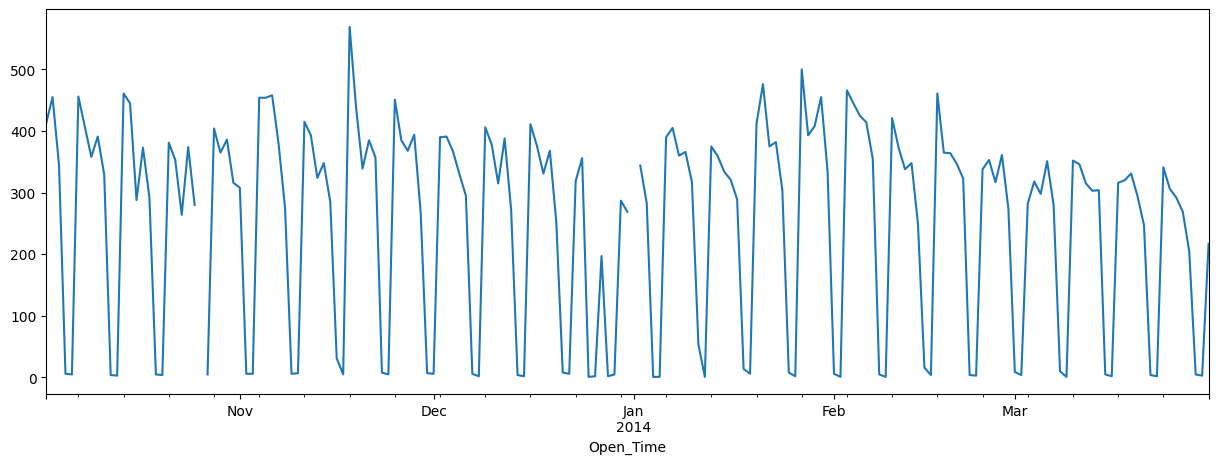

In [36]:
# plotting number of ticket per day 2013

data2.plot(figsize = (15,5))
plt.show()


In [37]:
# making a list of p,d,q

p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))

In [38]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472225
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363338433393
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4315812436926


In [41]:
# choosing minimum value of AIC and ARIMA for forcasting 

mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.783      2.576      0.010    6023.413    4.44e+04


In [42]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()


2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

## Visualization

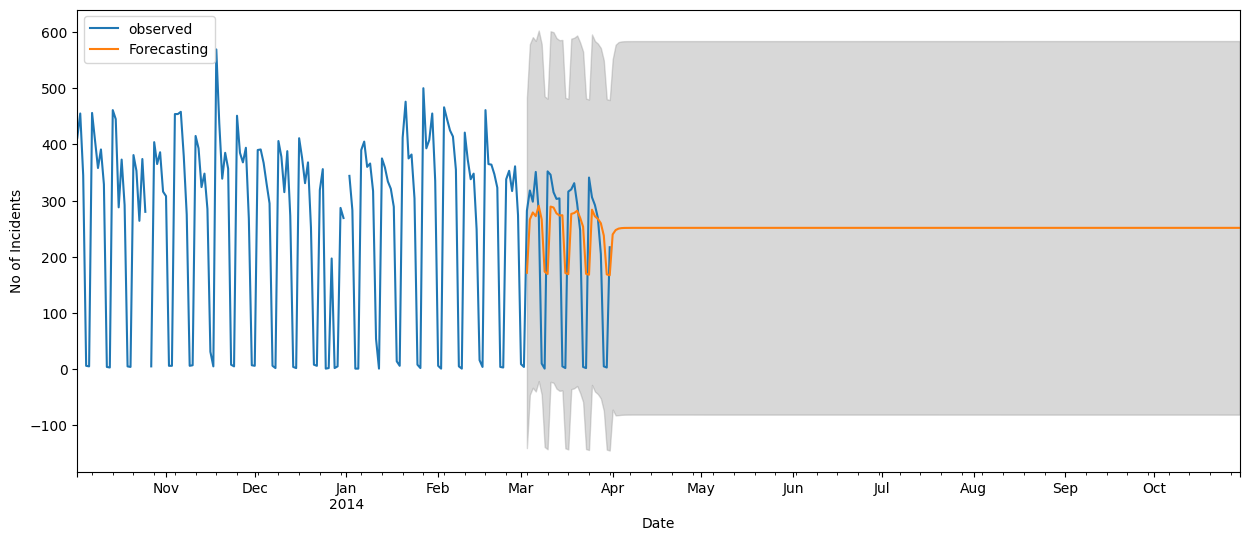

In [43]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Forecasting',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()